In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
ds = pd.read_csv("Admission_Predict.csv")
ds.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
x = ds.iloc[:,:-1].values
y = ds.iloc[:,-1].values

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [6]:
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.58696876, 0.12780879])

In [7]:
reg = LinearRegression()
reg.fit(x_train,y_train)

pred = reg.predict(x_test)

In [8]:
f_imp = reg.coef_
for i, v in enumerate(f_imp):
    print('Feature: %0d, Score:%f'%(i,v*10))

Feature: 0, Score:-0.571500
Feature: 1, Score:0.146008


Text(0.5, 0, 'Chance of admit')

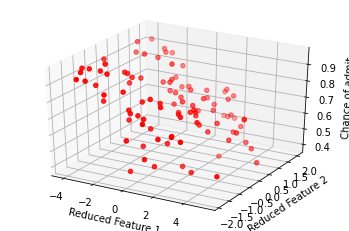

In [9]:
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter3D(x_test[:,0],x_test[:,1],y_test,c = 'red')
#ax.plot3D(x_test[:,0],x_test[:,1],pred,c = 'blue')
ax.set_xlabel('Reduced Feature 1')
ax.set_ylabel('Reduced Feature 2')
ax.set_zlabel('Chance of admit')

Text(0, 0.5, 'Chance of admit')

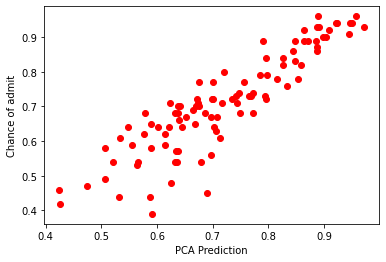

In [10]:
plt.scatter(pred,y_test,color='red');
#plt.plot(pred,y_test,color='blue')
plt.xlabel('PCA Prediction')
plt.ylabel('Chance of admit')

In [11]:
test_set_mse = mean_squared_error(y_test,pred)
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
test_set_r2 = r2_score(y_test, pred)

print("Squared Mean Error= ", test_set_mse)
print("Root Squared Mean Error= ", test_set_rmse)
print("Coefficient of Determination= ", test_set_r2)

Squared Mean Error=  0.0039944507218841515
Root Squared Mean Error=  0.06320166708152683
Coefficient of Determination=  0.8046723363381834


In [12]:
print("Accuracy Acheived= ", reg.score(x_test,y_test)*100,"%!")

Accuracy Acheived=  80.46723363381834 %!
